<center><h1>Haidar_Anastasia_HW2</h1></center>
<br>
<br>

Name: Anastasia Haidar
<br>
Github Username: ahaidar
<br>
USC ID: 1163-9833-46
<br>
https://github.com/USC-DSCI-552/homework-2-haidarnastya


## 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


Get the Cycle Power Plant Data Set

In [2]:
power_data = pd.read_excel('./data/CCPP/Folds5x2_pp.xlsx')
power_data.rename(columns={'PE': 'EP'}, inplace=True)
print(power_data.head())

      AT      V       AP     RH      EP
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


### (b) Exploring the data

#### i. rows and columns

In [3]:
#How many rows are in this data set? How many columns? What do the rows and columns represent?
power_data.count()
print('There are 9568 rows in this dataset.')

power_data.shape
print('There are 5 columsn in this dataset.')

print ('The columns represent each variable/feature collected for the dataset: ambient temp, pressure, relative humidity, exhuast vaccuum.\nThe rows represent each hour over the six years of data collection, with each cell containining the hourly average.')

There are 9568 rows in this dataset.
There are 5 columsn in this dataset.
The columns represent each variable/feature collected for the dataset: ambient temp, pressure, relative humidity, exhuast vaccuum.
The rows represent each hour over the six years of data collection, with each cell containining the hourly average.


#### ii. pairwise scatterplots of all the varianbles

The pairwise scatterplots show the relationships between each variable in the dataset. The scatterplots between the four variables seem to show some sort of relationship, whether positive or negative, with the predictor, EP. Specifically, it looks like Ambient Temperature (AT) and Exhaust Vaccum (V) have a more negative trending relationship with EP, while Ambient Pressure (AP) and Relative Humidity (RH) have a more positive trending relationship with EP. The scatterplots also show that there are some outliers in the data, particularly for AT and V, which may need to be addressed in the analysis.


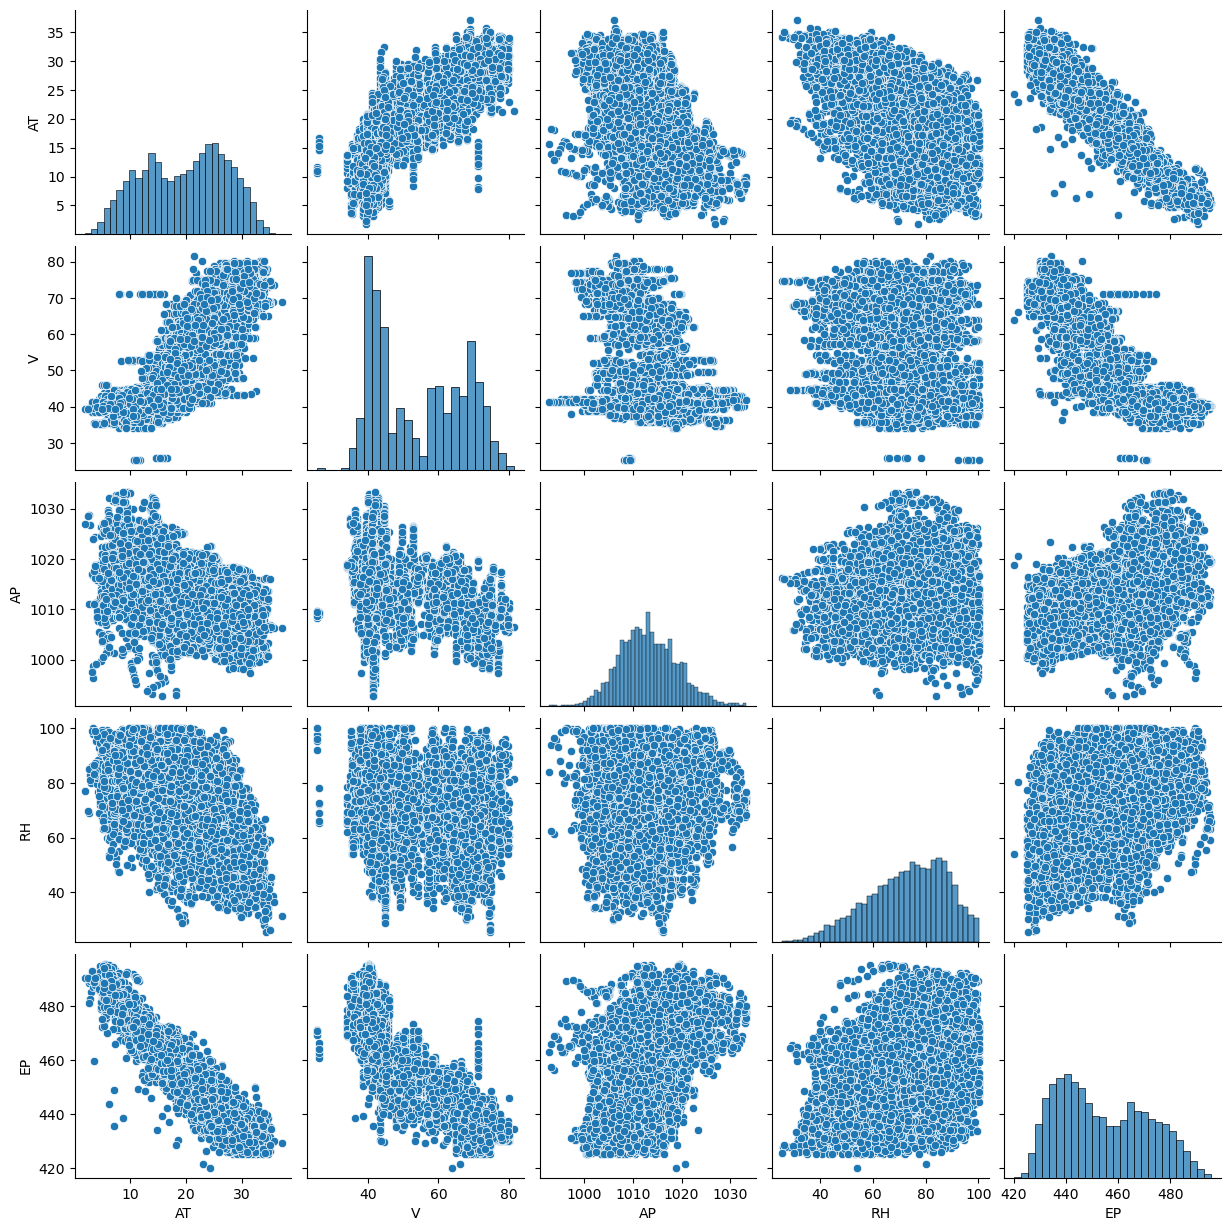

In [4]:
#Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) 
#with the dependent variable. Describe your findings.

sns.pairplot(power_data)
print("The pairwise scatterplots show the relationships between each variable in the dataset. The scatterplots between the four variables seem to show some sort of relationship, whether positive or negative, with the predictor, EP. Specifically, it looks like Ambient Temperature (AT) and Exhaust Vaccum (V) have a more negative trending relationship with EP, while Ambient Pressure (AP) and Relative Humidity (RH) have a more positive trending relationship with EP. The scatterplots also show that there are some outliers in the data, particularly for AT and V, which may need to be addressed in the analysis.")

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
#What are the mean, the median, range, first and third quartiles, and interquartile ranges
#of each of the variables in the dataset? Summarize them in a table.

summary_stats = power_data.describe().T

summary_table = pd.DataFrame({'Mean': summary_stats['mean'],
                              'Median': summary_stats['50%'],
                              'Range': summary_stats['max'] - summary_stats['min'],
                              '1st Quartile': summary_stats['25%'],
                              '3rd Quartile': summary_stats['75%'],
                              'Interquartile Range': summary_stats['75%'] - summary_stats['25%']})
print(summary_table)


           Mean    Median  Range  1st Quartile  3rd Quartile  \
AT    19.651231    20.345  35.30       13.5100         25.72   
V     54.305804    52.080  56.20       41.7400         66.54   
AP  1013.259078  1012.940  40.41     1009.1000       1017.26   
RH    73.308978    74.975  74.60       63.3275         84.83   
EP   454.365009   451.550  75.50      439.7500        468.43   

    Interquartile Range  
AT              12.2100  
V               24.8000  
AP               8.1600  
RH              21.5025  
EP              28.6800  


### (c) Simple Linear Regression


 Results for AT
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:22:35   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   

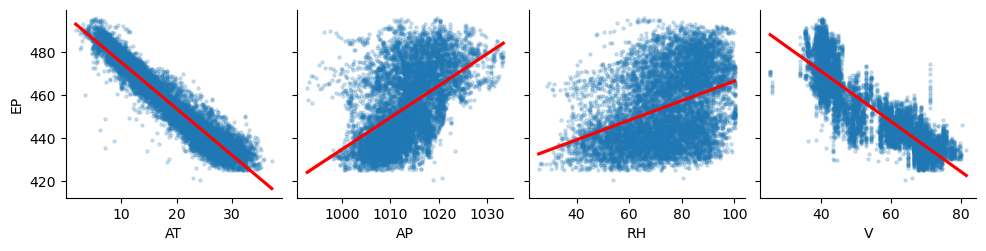

In [6]:
#For each predictor, fit a simple linear regression model to predict the response.
#Describe your results. In which of the models is there a statistically significant
#association between the predictor and the response? Create some plots to back
#up your assertions. Are there any outliers that you would like to remove from
#your data for each of these regression tasks?

#simple linear regression model
predictors = ['AT', 'AP', 'RH', 'V']

#linear regression model for each variable
for predictor in predictors:
    x=sm.add_constant(power_data[predictor])
    model = sm.OLS(power_data['EP'], x).fit()
    #print results for each predictor
    print("\n Results for", predictor)
    print(model.summary())

    #find model outliers
    outliers = model.outlier_test(method='bonf', alpha=0.05)
    outliers_to_remove = outliers[outliers['bonf(p)'] < 0.05].index.tolist()

    print("\n Potential outliers to remove:", outliers_to_remove)
    show_outliers = power_data.loc[outliers_to_remove, predictor]
    print(show_outliers)

#plot
sns.pairplot(power_data, x_vars=predictors, y_vars='EP', kind='reg', plot_kws={'scatter_kws': {"s": 5, "alpha": 0.2}, 'line_kws': {"color": "red"}})


For 1c above, we looked for outliers using statsmodel with Bonferroni p value correction. As shown above, there were nine outliers found within the regression model for the variable AT (ambient temperature), which had corrected p value less than 0.05. AP and RH variables had no outliers within their regression model, while V (exhaust vacuum) had one outlier with a corrected p value less than 0.05. 

### (d) Multiple Regression

In [7]:
#Fit a multiple regression model to predict the response using all of the predictors.
#Describe your results. For which predictors can we reject the null hypothesis
#H0 : Bj = 0?

x = power_data[predictors]
y = power_data['EP']

x = sm.add_constant(x)
multi_reg_model = sm.OLS(y, x).fit()
print(multi_reg_model.summary())

print ("\nP value is < α for all predictors, so we can reject the null hypothesis, H0 : Bj = 0, for all predictors.")


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:24:12   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### (e) 1c Compare to 1d

    Simple Linear Regression Coefficients  \
AT                              -2.171320   
AP                               1.489872   
RH                               0.455650   
V                               -1.168135   

    Multiple Linear Regression Coefficients  
AT                                -1.977513  
AP                                 0.062083  
RH                                -0.158054  
V                                 -0.233916  
The results from 1c (simple linear regression) show the individual relationship between each predictor and the response variable, EP. The results from 1d (multiple linear regression) show the combined effect of all predictors on the response variable. Both turned out to show statistically significant relationships between the predictors and the response variable, EP.


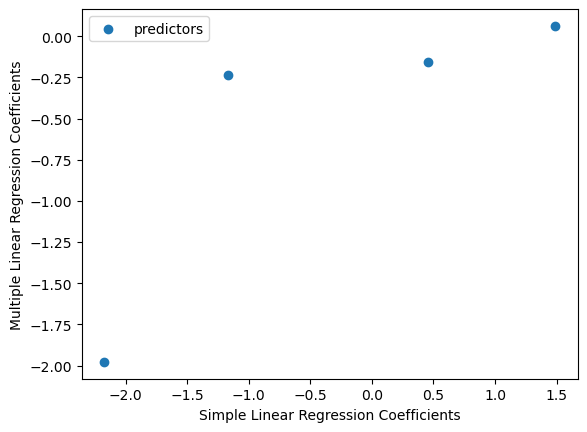

In [8]:
#How do your results from 1c compare to your results from 1d? Create a plot
#displaying the univariate regression coefficients from 1c on the x-axis, and the
#multiple regression coefficients from 1d on the y-axis. That is, each predictor is
#displayed as a single point in the plot. Its coefficient in a simple linear regression
#model is shown on the x-axis, and its coefficient estimate in the multiple linear
#regression model is shown on the y-axis.

reg_coefficients = {}

#pull coefficients from simple linear regressions
for predictor in predictors:
    x = sm.add_constant(power_data[predictor])
    model = sm.OLS(power_data['EP'], x).fit()
    reg_coefficients[predictor] = model.params[predictor]

#pull coefficients from multiple regression
multi_reg_coef = multi_reg_model.params[predictors]

reg_coefficients = pd.DataFrame({'Simple Linear Regression Coefficients': reg_coefficients, 'Multiple Linear Regression Coefficients': multi_reg_coef})
print(reg_coefficients)

print ("The results from 1c (simple linear regression) show the individual relationship between each predictor and the response variable, EP. The results from 1d (multiple linear regression) show the combined effect of all predictors on the response variable. Both turned out to show statistically significant relationships between the predictors and the response variable, EP.")

plt.scatter(reg_coefficients['Simple Linear Regression Coefficients'], reg_coefficients['Multiple Linear Regression Coefficients'])
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.legend(['predictors'])
plt.show()


### (f) Nonlinear Association

In [9]:
#Is there evidence of nonlinear association between any of the predictors and the
#response? To answer this question, for each predictor X, fit a model

x = power_data[predictors]
y = power_data['EP']

for predictor in predictors:
    x = power_data[[predictor]].copy()
    x['X_squared'] = x[predictor] ** 2
    x['X_cubed'] = x[predictor] ** 3

    x = sm.add_constant(x)

    nonlin_model = sm.OLS(y, x).fit()
    print(nonlin_model.summary())

print("\nAll models returned statistically significant p-values for the predictors, which indicates that all of the input variables do indeed have non-linear relationships with the response variable, EP. This is also backed up by the squared and cubed terms showing significance for almost all the predictors. The only predictor that had a p-value > alpha was V (exhaust vaccum) which was only for is squared term. Its cubed term however remained statistically significant, which still indicates that the variable likely has a non-linear relationship with the response variable, EP.")


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:24:13   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

### (g) Interactions of Predictors

In [10]:
#Is there evidence of association of interactions of predictors with the response? To
#answer this question, run a full linear regression model with all pairwise interaction
#terms and state whether any interaction terms are statistically significant

interact_model = smf.ols(formula= 'EP ~ AT * AP + AT * RH + AT * V + AP * RH + AP * V + RH * V', data=power_data).fit()
print(interact_model.summary())

print("\nThe interaction model shows that AT-V, AP-RH, and AP-V are statistically significant with p-values < alpha (0.05).")


                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:24:13   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### (h) Improvement

In [11]:
#Can you improve your model using possible interaction terms or nonlinear associations between 
#the predictors and response? Train the regression model on a
#randomly selected 70% subset of the data with all predictors. Also, run a regression model 
#involving all possible interaction terms and quadratic nonlinearities,
#and remove insignifcant variables using p-values (be careful about interaction
#terms). Test both models on the remaining points and report your train and test MSEs.

###-----------------------MODEL 1---------------------------------###
#new df for predictors only for training data
predictors_df = power_data.drop(columns=['EP'])

#take randomly selected 70% sample
train_x = predictors_df.sample(frac=0.7, random_state=42)

#bring back response var into df
train_y = power_data.loc[train_x.index, 'EP']

#test data - remaining 30%
test_x = predictors_df.drop(index=train_x.index)
test_y = power_data.loc[test_x.index, 'EP']

#add constant for intercept
train_constant = sm.add_constant(train_x)
test_constant = sm.add_constant(test_x)

#train/fit regression model
training_model = sm.OLS(train_y, train_constant).fit()

#test regression model 
test_model = training_model.predict(test_constant)
train_pred_model = training_model.predict(train_constant)

#report MSEs
mse_train_err = mean_squared_error(train_y, train_pred_model)
mse_test_err = mean_squared_error(test_y, test_model)

print("\nRegression Model summary:")
print(training_model.summary())
print("\nTraining MSE:", mse_train_err)
print("\nTest MSE:", mse_test_err)

#__________________________________________________________________#
###-----------------------MODEL 2---------------------------------###

polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

#train and test data
train_poly = polynomial.fit_transform(train_x)
test_poly = polynomial.transform(test_x)

feature_vars = polynomial.get_feature_names_out(input_features=train_x.columns)
#create df for feature vars outputs
train_poly_df = pd.DataFrame(train_poly, columns=feature_vars, index=train_x.index)
test_poly_df = pd.DataFrame(test_poly, columns=feature_vars, index=test_x.index)

#add constant for intercept
train_poly_constant = sm.add_constant(train_poly_df)
test_poly_constant = sm.add_constant(test_poly_df)

#fit model
poly_model = sm.OLS(train_y, train_poly_constant).fit()

#remove insignificant variables
alpha = 0.05
significant_vars = poly_model.pvalues[poly_model.pvalues < alpha].index.tolist()

if 'const' not in significant_vars:
    significant_vars = ['const'] + significant_vars

#fit new model without insignificant variables
signif_poly_model = sm.OLS(train_y, train_poly_constant[significant_vars]).fit()
print("\nPolynomial Model summary without insig. vars.:")
print(signif_poly_model.summary())

#test new model
train_poly_pred = signif_poly_model.predict(train_poly_constant[significant_vars])
test_poly_pred = signif_poly_model.predict(test_poly_constant[significant_vars])

#report MSEs
mse_train_poly_err = mean_squared_error(train_y, train_poly_pred)
mse_test_poly_err = mean_squared_error(test_y, test_poly_pred)
print("\nTraining Polynomial MSE:", mse_train_poly_err)
print("\nTest Polynomial MSE:", mse_test_poly_err)

print("\n Based on our reduced test MSE for the Polynomial Model with insignificant variables removed, we can conclude that we can improve our model by using a model that better fits non-linear associations.")



Regression Model summary:
                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:24:13   Log-Likelihood:                -19657.
No. Observations:                6698   AIC:                         3.932e+04
Df Residuals:                    6693   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        449.6961    

### (i) KNN

Optimal k value: 5 at lowest test error of 16.956720110104524


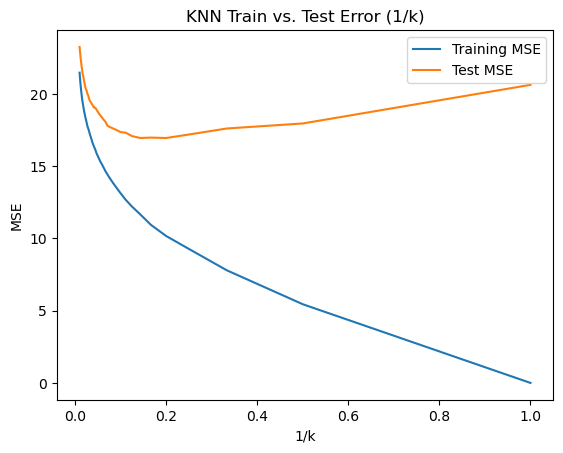

In [12]:
#Perform k-nearest neighbor regression for this dataset using both normalized
#and raw features. Find the value of k = {1, 2, ..., 100} that gives you the
#best fit. Plot the train and test errors in terms of 1/k.

k_values = np.arange(1, 101, 1)

train_errors = []
test_errors = []

for k in k_values: 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x, train_y)

    #predict
    train_predict = knn.predict(train_x)
    test_predict = knn.predict(test_x)

    #calculate errors
    train_err = mean_squared_error(train_y, train_predict)
    train_errors.append(train_err)

    test_err = mean_squared_error(test_y, test_predict)
    test_errors.append(test_err)

#find best k fit
optimal_k = k_values[test_errors.index(min(test_errors))]
lowest_test_error = min(test_errors)
print("Optimal k value:", optimal_k, "at lowest test error of", lowest_test_error)

#plot train and test errors for 1/k
#convert k to 1/k

inverse_k = 1 / k_values

plt.plot(inverse_k, train_errors, label='Training MSE')
plt.plot(inverse_k, test_errors, label='Test MSE')
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.title("KNN Train vs. Test Error (1/k)")
plt.show()

### (j ) Compare KNN and Linear

#Compare the results of KNN Regression with the linear regression model that has
#the smallest test error and provide your analysis.

Our smallest test error was from the Polynomial Regression Model after taking out the insignificant variables. The MSE was found to be 19.64616810791717. The KNN on the other hand had an optimal k value at k=5, which was found via its lowest test error, 16.956720110104524. In comparison, the KNN regression model performed better than the Polynomial Regression Model as it had an overall lower test MSE. This indicates that the KNN model was better able to fit the data and generalize to new data points.


###REFERENCES###

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
https://realpython.com/linear-regression-in-python/#python-packages-for-linear-regression
#copilot: can i loop through multiple different x's to regress against the same y for simple linear regression?
#copilot: how to change the size of the dots on the sns scatterplot? 
#copilot: how to change the color of the line in sns scatterplot?
https://seaborn.pydata.org/generated/seaborn.pairplot.html
https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html
#copilot: should you use the residuals to find the outlier?
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#https://www.geeksforgeeks.org/machine-learning/ml-multiple-linear-regression-using-python/
#copilot: how to label each point within matplotlib scatter plot?
#https://www.statsmodels.org/stable/api.html